In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import random
import os

In [4]:
df = pd.read_csv(r"Y:\departments\research_and_development\baseball_operations\clayton_goodiez\csv\polished_dfs\all_ready.csv")

In [27]:
def arsenal_hist(player_name):
    player_pitches = df[df['player_name'] == player_name]

    player_values = player_pitches.groupby('pitch_type')['stuff_plus'].mean()

    np.random.seed(0)

    pitch_types = player_pitches['pitch_type'].unique()

    num_pitch_types = len(pitch_types)

    fig, axes = plt.subplots(nrows=1, ncols=max(num_pitch_types, 1), figsize=(5 * max(num_pitch_types, 1), 5))

    if num_pitch_types == 1:
        axes = [axes]

    def get_random_color():
        return "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])

    for i, pitch_type in enumerate(pitch_types):
        pitch_data = df[df['pitch_type'] == pitch_type]['stuff_plus']
        kde = gaussian_kde(pitch_data)
        x_grid = np.linspace(min(pitch_data), max(pitch_data), 1000)
        color = get_random_color()
        axes[i].fill_between(x_grid, kde(x_grid), color=color, alpha=0.5)
        axes[i].plot(x_grid, kde(x_grid), color=color)
        
        # Extract the stuff_plus value for the current pitch type
        stuff_value = player_pitches[player_pitches['pitch_type'] == pitch_type]['stuff_plus'].iloc[0]
        axes[i].set_title(f'{pitch_type}: {stuff_value}', loc='left')

        if pitch_type in player_values:
            player_value = player_values[pitch_type]
            axes[i].axvline(player_value, color='black', linestyle='dashed', linewidth=1.5)

        axes[i].tick_params(axis='y', which='both', left=False, labelleft=False)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_visible(True)

    plt.suptitle(f"{player_name} Arsenal Stuff+", fontsize=16, y=1)
    plt.tight_layout()
    padding = 0.2

    filename = f"{player_name.replace(' ', '_')}_Arsenal_Histogram.png"
    save_path = r'C:\Users\adam.bloebaum\Documents\GitHub\stuff-baby\adam\Arsenal-Histograms'
    full_path = os.path.join(save_path, filename)

    plt.savefig(full_path, dpi=300)

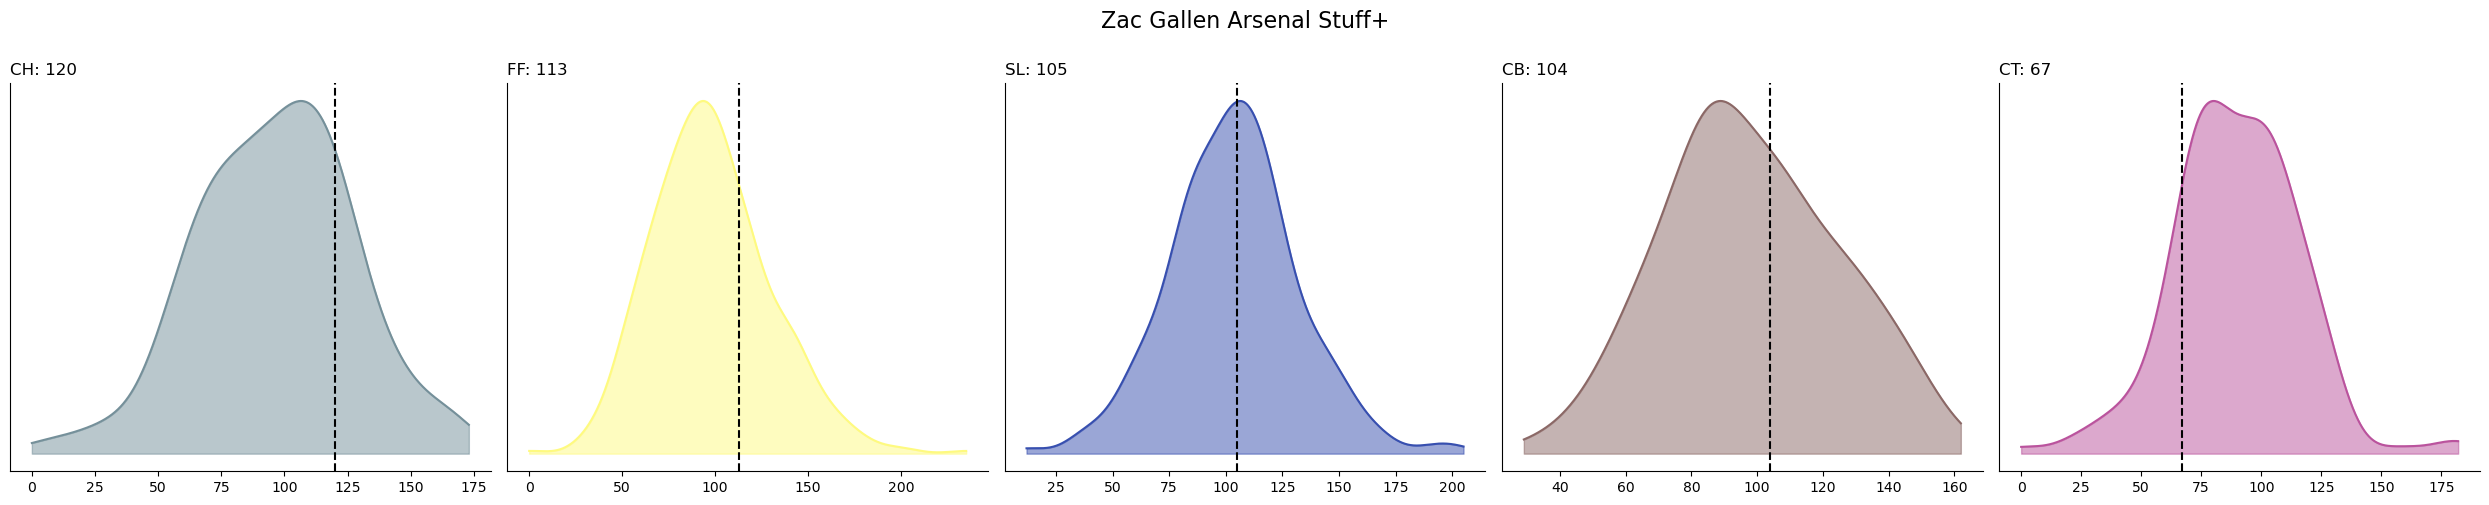

In [37]:
arsenal_hist('Zac Gallen')